In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
loc = '/home/tbrownex/data/investing/Fisher/'

In [3]:
df = pd.read_csv(loc+'fundValues.csv',
                 thousands=',',
                 dtype={'Amount': np.float32})

In [4]:
df.fillna(0, inplace=True)
df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(x))
df.columns = ['date', 'account', 'amount', 'transaction_amount']

In [6]:
total = df.groupby('date')['amount'].sum()

In [7]:
total

date
2022-06-01    2186115.0
2022-07-01    2335528.0
2022-08-01    2505004.0
2022-09-01    2388179.0
2022-10-01    2177461.0
2022-11-01    2332096.0
2022-12-01    2496822.0
2023-01-01    2341571.0
2023-02-01    2531599.0
2023-03-01    2446299.0
2023-04-01    2518409.0
2023-05-01    2549932.0
2023-06-01    2573147.0
Name: amount, dtype: float32

<AxesSubplot: xlabel='date'>

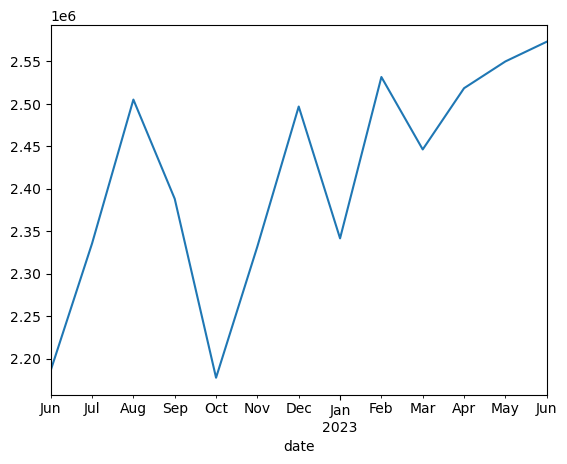

In [8]:
total.plot()

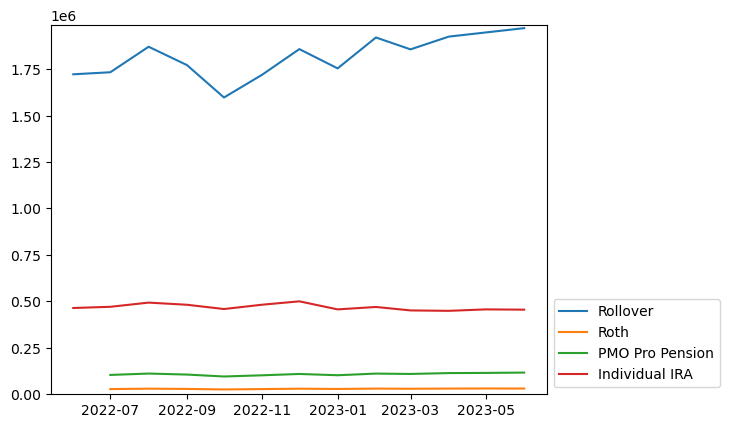

In [39]:
accts = set(df.account)

for acct in accts:
    tmp = df[df['account'] == acct].sort_values('date')
    plt.plot(tmp.date, tmp.amount, label=acct)
    plt.ylim(bottom=0)
plt.legend(loc=3,bbox_to_anchor=(1,0))
plt.show()
plt.close()